"How does the type of property affect price of listings "

Introduction

Introduction
data and the souce: "Boston Airbnb Open data" from https://www.kaggle.com/datasets/airbnb/boston
The main aim of this project is to determine the impact of types and characteristics of Airbnb listing on its price. Airbnb is a home-sharing plaform that allows hosts to rent out their homes in a way. The hosts get to set the prices for their listings, under certain regulations and guidance by the platform. There are many attributes of the listings (e.g., neighbourhood, amenities, reviews) that would possibly affect the pricing, but the type of property, being the most visible and distinguishable characteristic, certainly have a significant impact on the pricing. 
findings: 

In [58]:
import pandas as pd

In [59]:
import numpy as np

In [60]:
df = pd.read_csv('listings.csv')

In [61]:
df.head() 

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


X variable: property_type, room_type, bathrooms, bedrooms
Y variable: Price
The x variables I chose here are all related to the type of property (and features of the property). Respectively, the variables represent what type of property it is (e.g. apartment, condo, house), what type of room they get (e.g. a shared room, an entire apartment, a private room), and how many bathrooms and bedrooms the property has. These factors must have a strong correlation with the y variable, price, as it is the distinct characteristic that affect pricing. 

Data Cleaning

In [62]:
#Data cleaning

#Dropping NA values
df.isnull().sum()  # To check for missing values
columns_to_drop_na = ['price', 'property_type', 'room_type', 'bathrooms', 'bedrooms']
data_cleaned = df.dropna(subset=columns_to_drop_na)

#Dropping duplicates
df.drop_duplicates(inplace=False)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00


In [63]:
#Checking if all necessary values were removed 

if df.isna().any().any():
    print("There are still NA values in the DataFrame.")
else:
    print("All NA values have been removed.")

if df.duplicated().any():
    print("There are still duplicate rows in the DataFrame.")
else:
    print("All duplicates have been removed.")


There are still NA values in the DataFrame.
All duplicates have been removed.


In [64]:
#data cleaning for y variable 
#some abnormalities observed while looking at the raw data
#need to be converted to a numeric format and drop rows with non-numeric values to get summary statistics 

# remove the '$' sign and ',' from the 'price' column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(str)

# convert 'price' to numeric, setting errors='coerce' will replace non-numeric values with NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# drop rows where 'price' is NaN 
df = df.dropna(subset=['price'])

# check if everything is accurately executed
df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


Summary Statistics

In [65]:
x = df[['property_type', 'room_type', 'bathrooms', 'bedrooms']]
y = df['price']

In [66]:
# Calculate summary statistics for x 
summary_x = x.describe(include=[object, 'category', float, int])
print("Summary Statistics for x:\n", summary_x)

# Calculate summary statistics for y
summary_y = y.describe()
print("\nSummary Statistics for y:\n", summary_y)

Summary Statistics for x:
        property_type        room_type    bathrooms     bedrooms
count           3582             3585  3571.000000  3575.000000
unique            13                3          NaN          NaN
top        Apartment  Entire home/apt          NaN          NaN
freq            2612             2127          NaN          NaN
mean             NaN              NaN     1.221647     1.255944
std              NaN              NaN     0.501487     0.753060
min              NaN              NaN     0.000000     0.000000
25%              NaN              NaN     1.000000     1.000000
50%              NaN              NaN     1.000000     1.000000
75%              NaN              NaN     1.000000     2.000000
max              NaN              NaN     6.000000     5.000000

Summary Statistics for y:
 count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: pri

Explanation for the summary statistics:


Visualization 

In [67]:
#property types 
unique_property_types = df['property_type'].unique()
unique_property_types

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', nan, 'Camper/RV'], dtype=object)

In [68]:
#drop na
unique_property_types = df['property_type'].unique()
property_types_clean = [x for x in unique_property_types if x == x]
property_types_clean

['House',
 'Apartment',
 'Condominium',
 'Villa',
 'Bed & Breakfast',
 'Townhouse',
 'Entire Floor',
 'Loft',
 'Guesthouse',
 'Boat',
 'Dorm',
 'Other',
 'Camper/RV']

In [69]:
#room types
unique_room_types = df['room_type'].unique()
unique_room_types

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [76]:
#number of bedrooms
num_bedroom = df['bedrooms'].unique()
num_bedroom

array([ 2.,  1.,  0.,  3.,  4.,  5., nan])

In [71]:
#drop na 
num_bedroom = df['bedrooms'].unique()
num_bedroom_clean = num_bedroom[~np.isnan(num_bedroom)]
num_bedroom_clean

array([2., 1., 0., 3., 4., 5.])

In [72]:
#number of bathrooms
num_bathrooms = df['bathrooms'].unique()
num_bathrooms

array([1.5, 1. , 2. , 0. , 2.5, 3.5, nan, 3. , 0.5, 4.5, 4. , 5. , 6. ])

In [73]:
#drop na
num_bathrooms = df['bathrooms'].unique()
num_bathrooms_clean = num_bathrooms[~np.isnan(num_bathrooms)]
num_bathrooms_clean

array([1.5, 1. , 2. , 0. , 2.5, 3.5, 3. , 0.5, 4.5, 4. , 5. , 6. ])

In [74]:
#import necessary packages for visualization
! pip install -q qeds fiona geopandas xgboost gensim folium pyLDAvis descartes seaborn

import matplotlib
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm #for linear regression: sm.ols
import seaborn as sns


from pandas_datareader import DataReader

%matplotlib inline
# activate plot theme
import qeds

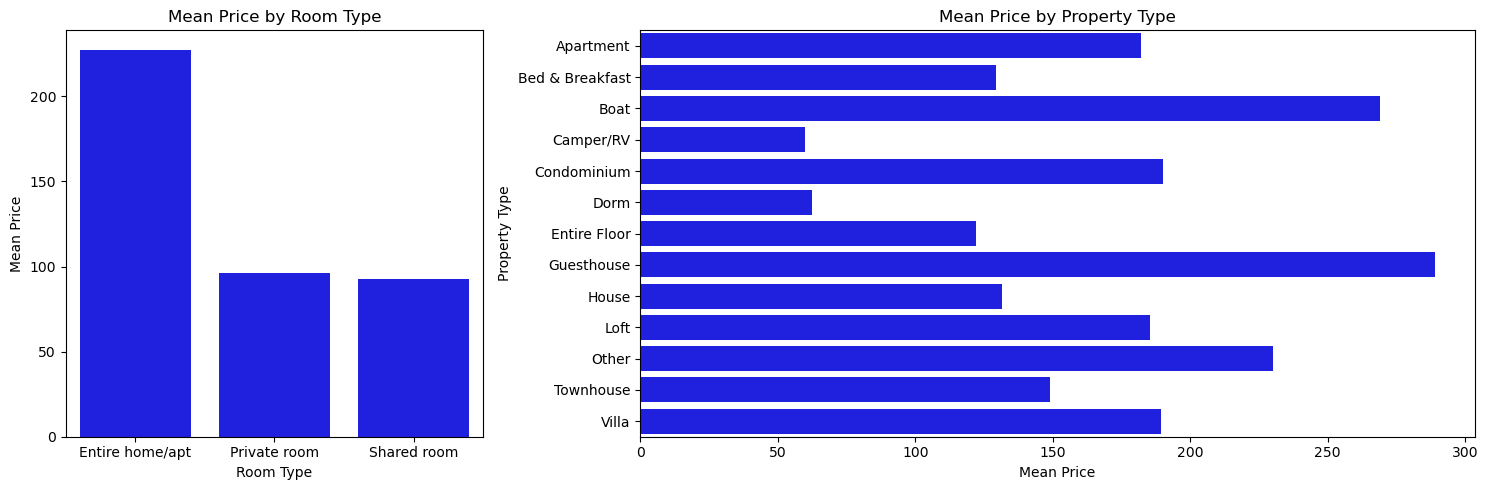

In [75]:
# Bar chart to show the relationship between room/property type and the price 

# Calculate mean prices for room type and property type
mean_price_by_room_type = df.groupby('room_type')['price'].mean().reset_index()
mean_price_by_property_type = df.groupby('property_type')['price'].mean().reset_index()

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 2]})


# Bar chart for mean price by room type
sns.barplot(x='room_type', y='price', data=mean_price_by_room_type, ax=ax[0], color='blue')
ax[0].set_title('Mean Price by Room Type')
ax[0].set_xlabel('Room Type')
ax[0].set_ylabel('Mean Price')

# Bar chart for mean price by property type
# For better readability, the property type is set on the y-axis
sns.barplot(x='price', y='property_type', data=mean_price_by_property_type, ax=ax[1], color='blue')
ax[1].set_title('Mean Price by Property Type')
ax[1].set_xlabel('Mean Price')
ax[1].set_ylabel('Property Type')
ax[1].tick_params(axis='y', labelsize=10)  # Adjust label size for readability

plt.tight_layout()
plt.show()

Explanation for the bar chart


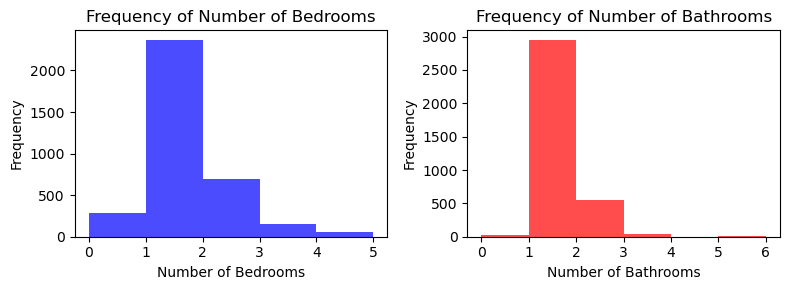

In [87]:
# histogram to show the relationship between price and the number of bedrooms/bathrooms

# Create a figure with two subplots for histograms
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# Histogram for the frequency of number of bedrooms
ax[0].hist(data_cleaned['bedrooms'], bins=range(int(data_cleaned['bedrooms'].max()) + 1), color='blue', alpha=0.7)
ax[0].set_title('Frequency of Number of Bedrooms')
ax[0].set_xlabel('Number of Bedrooms')
ax[0].set_ylabel('Frequency')
ax[0].set_xticks(range(int(data_cleaned['bedrooms'].max()) + 1))

# Histogram for the frequency of number of bathrooms
ax[1].hist(data_cleaned['bathrooms'], bins=range(int(data_cleaned['bathrooms'].max()) + 1), color='red', alpha=0.7)
ax[1].set_title('Frequency of Number of Bathrooms')
ax[1].set_xlabel('Number of Bathrooms')
ax[1].set_ylabel('Frequency')
ax[1].set_xticks(range(int(data_cleaned['bathrooms'].max()) + 1))

plt.tight_layout()
plt.show()

Conclusion

write conclusion